## Graphic utilities

AQUA is not providing a full set of tools for visualization. Other excellent packages can be used and are used by our diagnostics to represent data.

Anyway a simple utility to plot a map is provided. It is based on the cartopy package, together with matplotlib.

In [1]:
from aqua import Reader, plot_single_map

In [2]:
%reload_ext autoreload
%autoreload 2

Let's load some example data:

In [3]:
reader = Reader(model="ERA5", exp="era5", source="monthly")

In [4]:
data = reader.retrieve()

2023-12-06 18:18:20 :: eccodes :: WARNING  -> ShortName tprate have multiple grib codes associated: ['260048', '172228']
2023-12-06 18:18:20 :: eccodes :: WARNING  -> AQUA will take the first so that tprate -> 260048, please set up a correct fix if this does not look right
2023-12-06 18:18:20 :: eccodes :: WARNING  -> ShortName tcc have multiple grib codes associated: ['228164', '164']
2023-12-06 18:18:20 :: eccodes :: WARNING  -> AQUA will take the first so that tcc -> 228164, please set up a correct fix if this does not look right
2023-12-06 18:18:20 :: eccodes :: WARNING  -> ShortName sst have multiple grib codes associated: ['34', '151159']
2023-12-06 18:18:20 :: eccodes :: WARNING  -> AQUA will take the first so that tprate -> 260048, please set up a correct fix if this does not look right
2023-12-06 18:18:20 :: eccodes :: WARNING  -> ShortName tcc have multiple grib codes associated: ['228164', '164']
2023-12-06 18:18:20 :: eccodes :: WARNING  -> AQUA will take the first so that 

We now load `sst` so that we deal with oceanic data:

In [5]:
sst = data["sst"]
sst_plot = sst.isel(time=1)

## Simple map plot

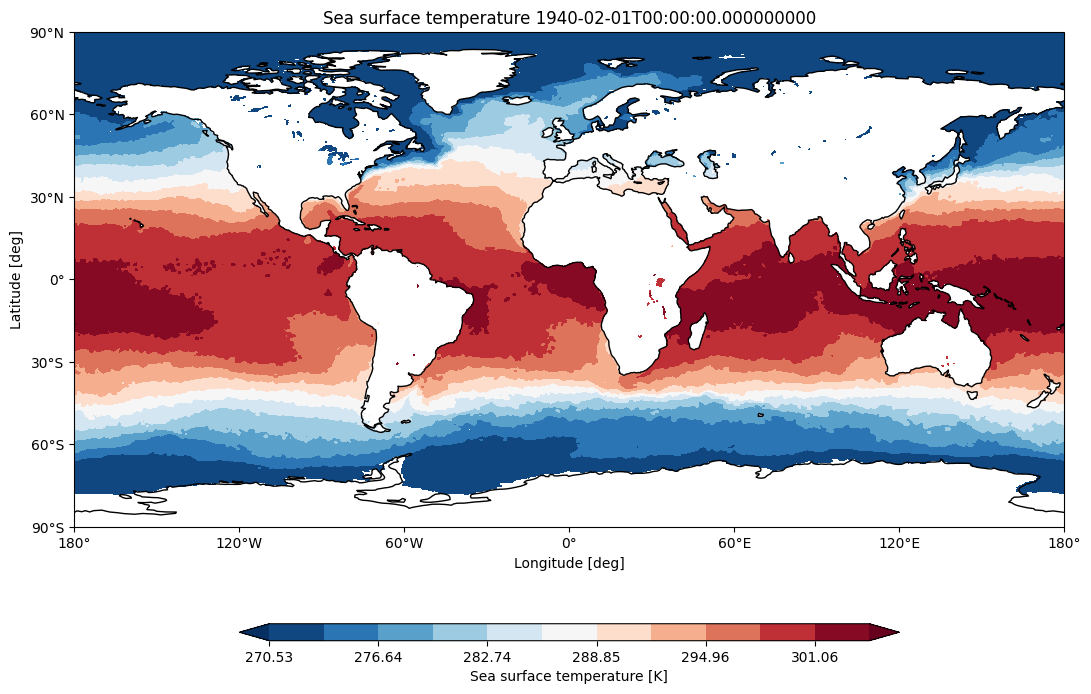

In [6]:
plot_single_map(sst_plot)

If nothing but the data is provided, the utility will plot the data on a map and adapt colorbar, title, etc. to the data.
The function is loading data in memory and applying a check if lon data have an empty central point to be fixed.

A custom title can be provided:

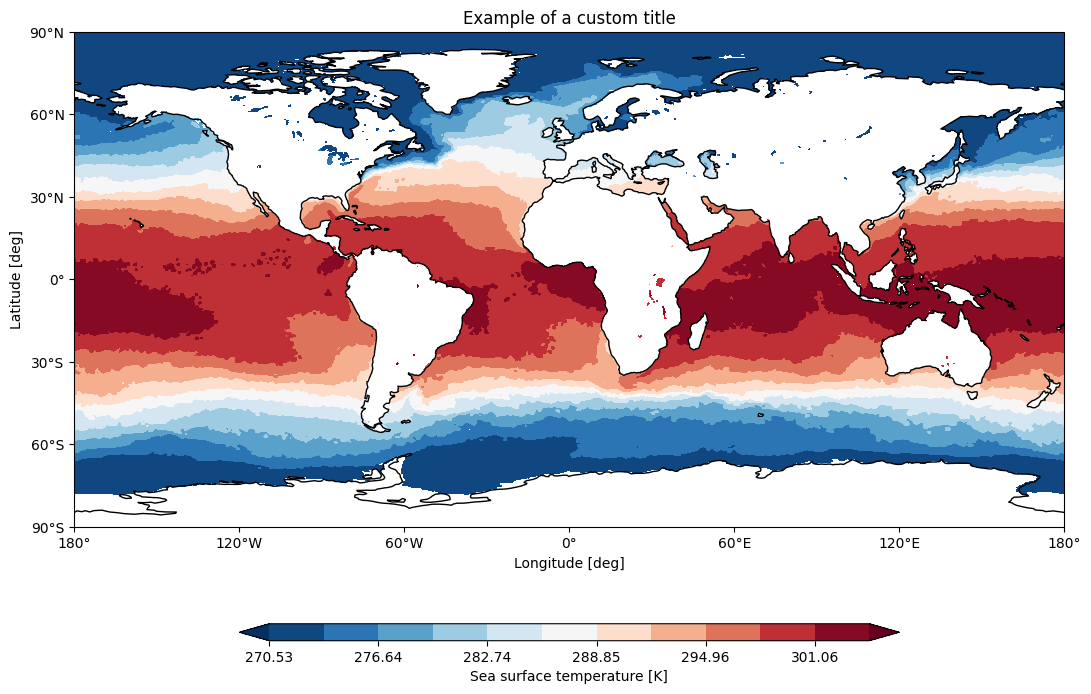

In [7]:
plot_single_map(sst_plot, title="Example of a custom title")

The function can also save the plot with a custom filename and output directory, with custom format (the format will be added automatically) and dpi.
The save function has to be enabled with `save=True`:

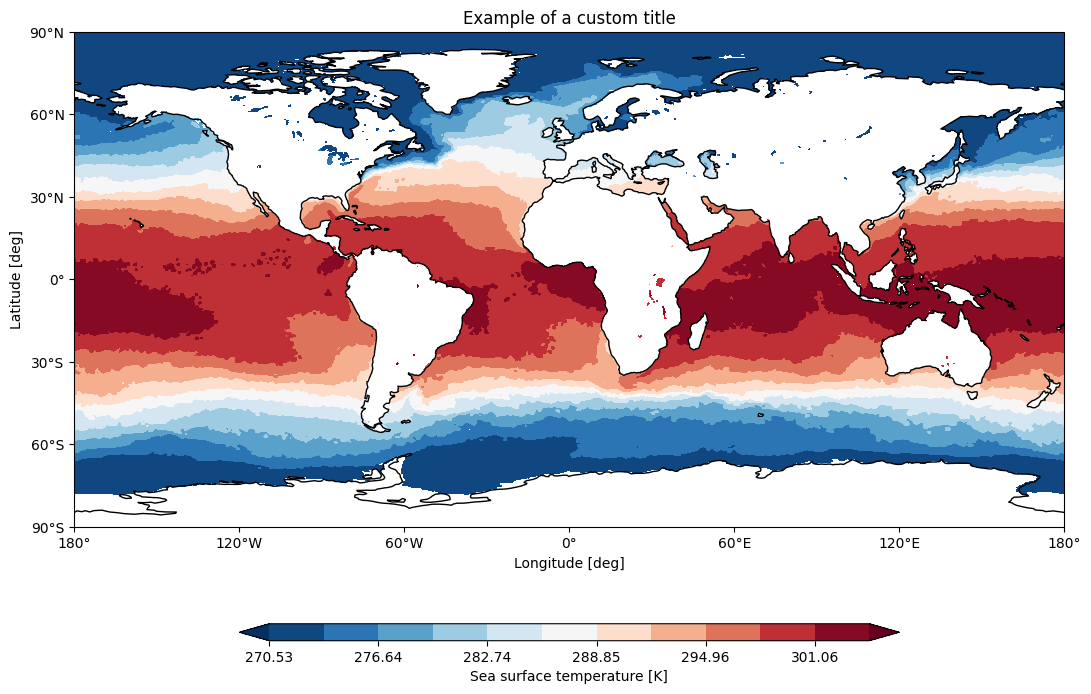

In [8]:
plot_single_map(sst_plot, title="Example of a custom title", filename="example", outputdir=".", format="png", dpi=300, save=True)

The minimum and maximum values can be provided and the possibility to choose to symmetrize the colorbar around zero is available.
If the symmetrize option is enabled, the minimum and maximum values are ignored if provided:

2023-12-06 18:18:27 :: plot_single_map :: INFO     -> Updating the log_level to DEBUG
2023-12-06 18:18:27 :: plot_single_map :: INFO     -> Loading data in memory
2023-12-06 18:18:27 :: plot_single_map :: INFO     -> Adding cyclic longitude
2023-12-06 18:18:27 :: plot_single_map :: DEBUG    -> Setting figsize to (11, 8.5)
2023-12-06 18:18:27 :: plot_single_map :: DEBUG    -> Setting vmin to 250, vmax to 320


2023-12-06 18:18:28 :: plot_single_map :: DEBUG    -> Adding coastlines
2023-12-06 18:18:28 :: plot_single_map :: DEBUG    -> Setting longitude ticks from -180 to 180
2023-12-06 18:18:28 :: plot_single_map :: DEBUG    -> Setting longitude ticks to [-180. -120.  -60.    0.   60.  120.  180.]
2023-12-06 18:18:28 :: plot_single_map :: DEBUG    -> Setting latitude ticks from -90.0 to 90.0
2023-12-06 18:18:28 :: cbar get label :: INFO     -> Updating the log_level to DEBUG
2023-12-06 18:18:28 :: cbar get label :: DEBUG    -> Using Sea surface temperature as colorbar label
2023-12-06 18:18:28 :: cbar get label :: DEBUG    -> Adding units to colorbar label
2023-12-06 18:18:28 :: plot_single_map :: DEBUG    -> Setting colorbar label to Sea surface temperature [K]
2023-12-06 18:18:28 :: set map title :: INFO     -> Updating the log_level to DEBUG
2023-12-06 18:18:28 :: set map title :: DEBUG    -> Using long_name as map title
2023-12-06 18:18:28 :: set map title :: DEBUG    -> Adding time to ma

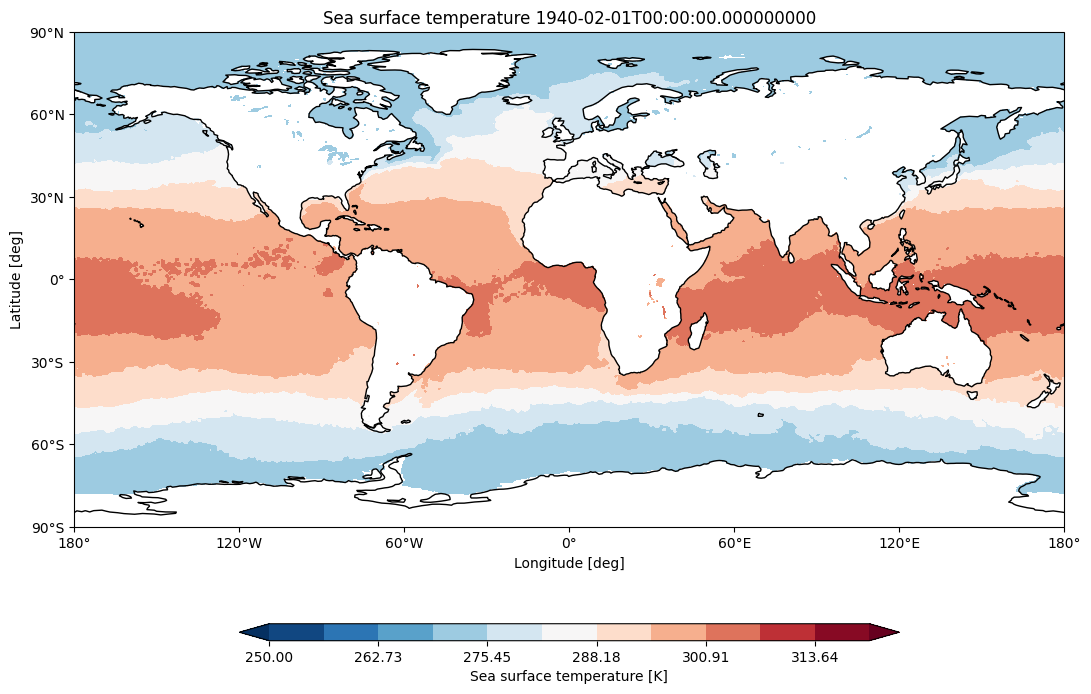

In [9]:
plot_single_map(sst_plot, vmin=250, vmax=320, loglevel="DEBUG")

As can be seen above contourplot is the standard representation (a number of levels can be provided), but pcolormesh is also available:

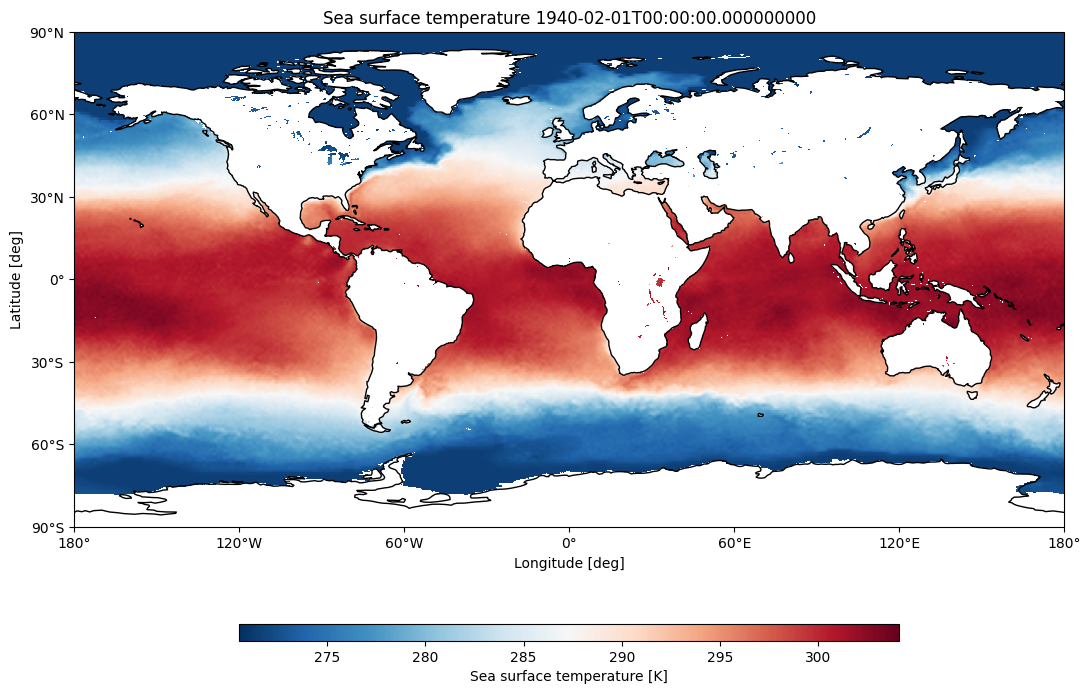

In [10]:
plot_single_map(sst_plot, contour=False)

It is also possible to change colormap and add gridlines:

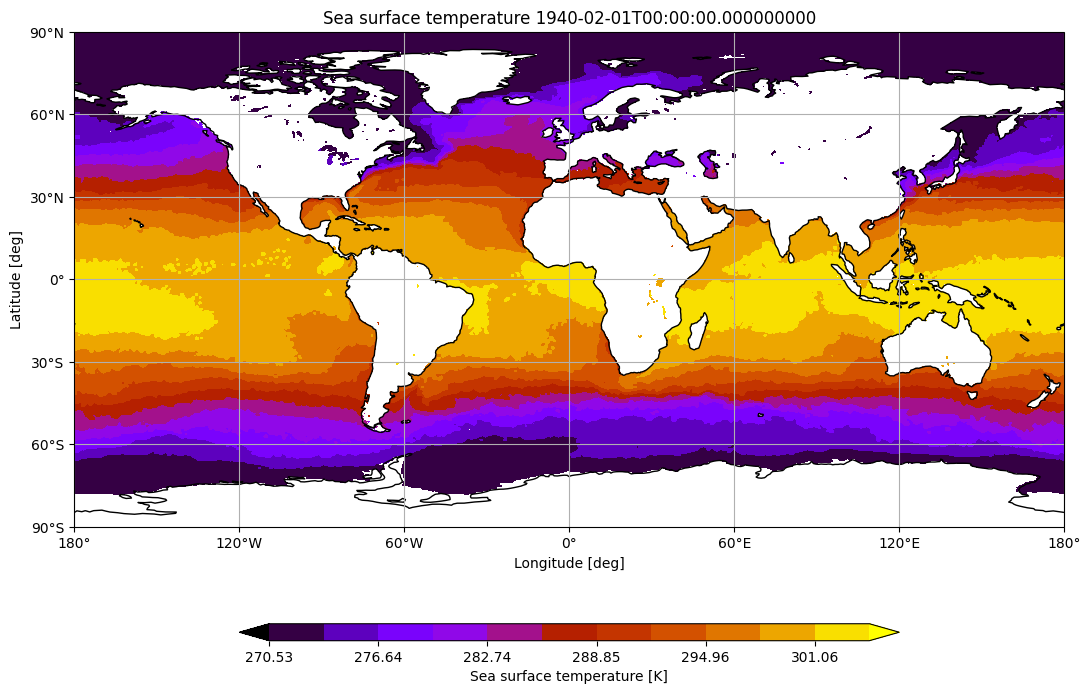

In [11]:
plot_single_map(sst_plot, cmap="gnuplot", gridlines=True)

## Area selection for a plot

It is possible to use the function and the utilities to plot a specific area of the globe.
The function to perform the area selection is available in the `utils` module.
Let's focus on the Nina3.4 region:

In [12]:
from aqua.util import area_selection

In [13]:
# Nino 3.4 region
lon_lim = (-170, -120)
lat_lim = (-5, 5)

sst_sel = area_selection(sst_plot, lon=lon_lim, lat=lat_lim)

We can analyze the data in the region. The area selection function by default is not dropping the data outside the region, so that a simple call to the plotting function will plot the data in the region and white elsewhere:

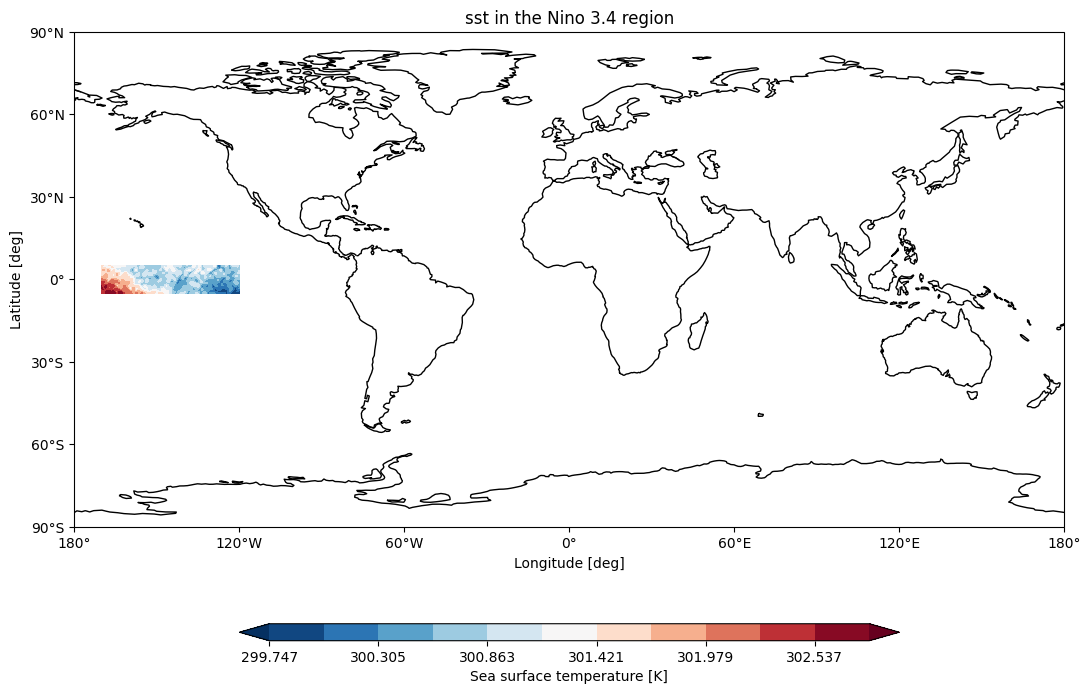

In [14]:
plot_single_map(sst_sel, title='sst in the Nino 3.4 region')

We need to drop the value outside the region. This can be done with the `drop=True` parameter in the area selection function:

In [15]:
sst_sel_box = area_selection(sst_plot, lon=lon_lim, lat=lat_lim, drop=True)
sst_sel_box

<xarray.DataArray 'sst' (lat: 41, lon: 201)>
array([[302.4746 , 302.47266, 302.4795 , ..., 299.8369 , 299.8623 ,
        299.8662 ],
       [302.4629 , 302.4619 , 302.4707 , ..., 299.88672, 299.86523,
        299.86426],
       [302.49512, 302.49512, 302.49902, ..., 299.97363, 299.95117,
        299.92773],
       ...,
       [301.48242, 301.43848, 301.32617, ..., 300.85156, 300.8545 ,
        300.8086 ],
       [301.62305, 301.45703, 301.33984, ..., 300.88672, 300.8213 ,
        300.7744 ],
       [301.7627 , 301.59277, 301.42285, ..., 300.90137, 300.833  ,
        300.74902]], dtype=float32)
Coordinates:
    time     datetime64[ns] 1940-02-01
  * lat      (lat) float64 -5.0 -4.75 -4.5 -4.25 -4.0 ... 4.0 4.25 4.5 4.75 5.0
  * lon      (lon) float64 190.0 190.2 190.5 190.8 ... 239.2 239.5 239.8 240.0
Attributes:
    long_name:  Sea surface temperature
    units:      K
    code:       34
    table:      128
    history:    2023-12-06 18:18:20 variable renamed by AQUA fixer;\n
    paramId:    34
    cfVarName:  sst
    shortName:  sst

We unset the figsize to use the default one and we change the number of standard yticks.

/LUMI_TYKKY_EEvEEJB/miniconda/envs/env1/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


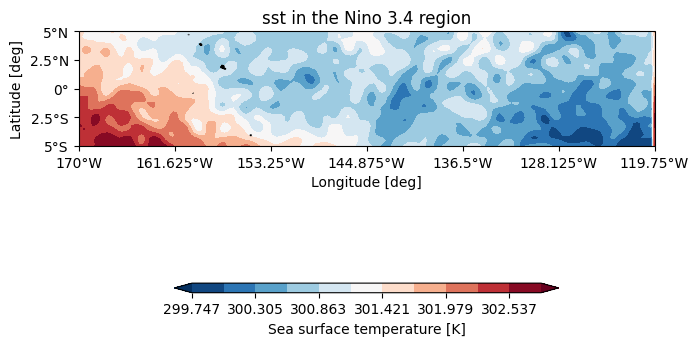

In [16]:
plot_single_map(sst_sel_box, title='sst in the Nino 3.4 region', figsize=None, nyticks=5)